---
<h1><center> Analyze III - Manu Mathew </center></h1>

--- 

## Packages Used:

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 12.0)
import pandas as pd
votes_df = pd.read_csv("votes.csv")
data_df = pd.read_csv("data.csv")
ec_df=pd.read_csv('ec.csv')#EC votes with Alaska
ec1_df=pd.read_csv('ec1.csv')#EC votes without Alaska



Populating the interactive namespace from numpy and matplotlib


# Data Preparation


In [5]:
import numpy as np
from scipy import stats



m_df=pd.merge(votes_df, data_df, on='Fips')
m_df['frac_dem08']=(m_df["Democrats 08 (Votes)"]/(m_df["Democrats 08 (Votes)"]+m_df["Republicans 08 (Votes)"]))#Fraction of democratic votes from 2008
m_df['frac_dem12']=(m_df["Democrats 12 (Votes)"]/(m_df["Democrats 12 (Votes)"]+m_df["Republicans 12 (Votes)"]))#Fraction of democratic votes from 2012
m_df['frac_rep08']=1-m_df['frac_dem08']#Fraction of Republican votes from 2008
m_df['frac_rep12']=1-m_df['frac_dem12']#Fraction of Republican votes from 2012
m_df['frac_rep16']=(m_df["votes16_trumpd"]/(m_df["votes16_trumpd"]+m_df["votes16_clintonh"]))#Fraction of Republican votes from 2016
m_df['frac_dem16']=1-m_df['frac_rep16']#Fraction of democratic votes from 2016
m_df['Total_votes16']=m_df["votes16_trumpd"]+m_df["votes16_clintonh"]#Total votes from 2016
m_df['Total_votes12']=m_df["Democrats 12 (Votes)"]+m_df["Republicans 12 (Votes)"]#Total votes from 2012
m_df['Total_votes08']=m_df["Democrats 08 (Votes)"]+m_df["Republicans 08 (Votes)"]#Total votes from 2008
m_df['total_avg_votes']=(m_df['Total_votes08']+m_df['Total_votes12'])/2 # Average of total votes from 2008 and 2012

refined_df=m_df.drop(['White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population','White_Asian','Homicide.rate','Infant.mortality','ST'], axis=1)#dropped duplicate columns


final_df=refined_df.fillna(refined_df.mean())#filled all NaN values with mean of columns
#final_df.loc[:,['votes16_trumpd','votes16_clintonh','Total_votes16','Total_votes12','Total_votes08','Votes']]


In [6]:
import numpy as np
from scipy import stats
a=(final_df.corr(method='pearson')).iloc[9:48,50:52]
a[a['frac_rep08'].abs()>0.35]# gives the rows of 2008 election whose absolute value of correlation coefficients are greater than 0.35
a[a['frac_rep12'].abs()>0.35]#gives the rows of 2008 election whose absolute value of correlation coefficients are greater than 0.35



,frac_rep08,frac_rep12
Graduate Degree,-0.367141,-0.369358
White,0.352021,0.438866
Black,-0.311356,-0.392281
Children.in.single.parent.households,-0.366511,-0.427468
Sexually.transmitted.infections,-0.335371,-0.397497


# Data Stacking

In [7]:
df1=final_df.loc[:,['County','frac_rep08','Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', "At Least Bachelors's Degree",
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Injury.deaths']]#dataframe with fraction of republican party from 2008 and all independent variables
df3=df1.rename(index=str, columns={"frac_rep08": "frac_rep"})# renamed "frac_rep08" to "frac_rep"              
df2=final_df.loc[:,['County','frac_rep12','Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', "At Least Bachelors's Degree",
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Injury.deaths']]#dataframe with fraction of republican party from 2012 and all independent variables
df4=df2.rename(index=str, columns={"frac_rep12": "frac_rep"})# renamed "frac_rep12" to "frac_rep"  

combined=pd.concat([df3,df4],axis=0,ignore_index=True)#stacked df3 and df4 vertically
combined.loc[combined['frac_rep']>=0.5, 'frac_rep'] = 1#changed vote fraction of republican party above 0.5 to 1
combined.loc[combined['frac_rep']<0.5, 'frac_rep'] = 0#changed vote fraction of republican party below 0.5 to 0

# Data Input To Model For Logistic Regression

In [8]:
Y=combined['frac_rep']
X=combined.loc[:,['Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', "At Least Bachelors's Degree",
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Injury.deaths']]

Xtest=final_df.loc[:,['Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', "At Least Bachelors's Degree",
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations', 'White',
       'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'SIRE_homogeneity',
       'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Injury.deaths']]

# Logistic Regression-Trial 1

Actual electoral votes of Republican party: 302
Actual electoral votes of Democratic party: 236
Predicted electoral votes of Republican party: 193
Predicted electoral votes of Democratic party: 345
Accuracy of the trained model: 82.96720789557466 %
Accuracy of prediction by county: 90.6717605858007 %
Accuracy of prediction by state: 78.43137254901961 %


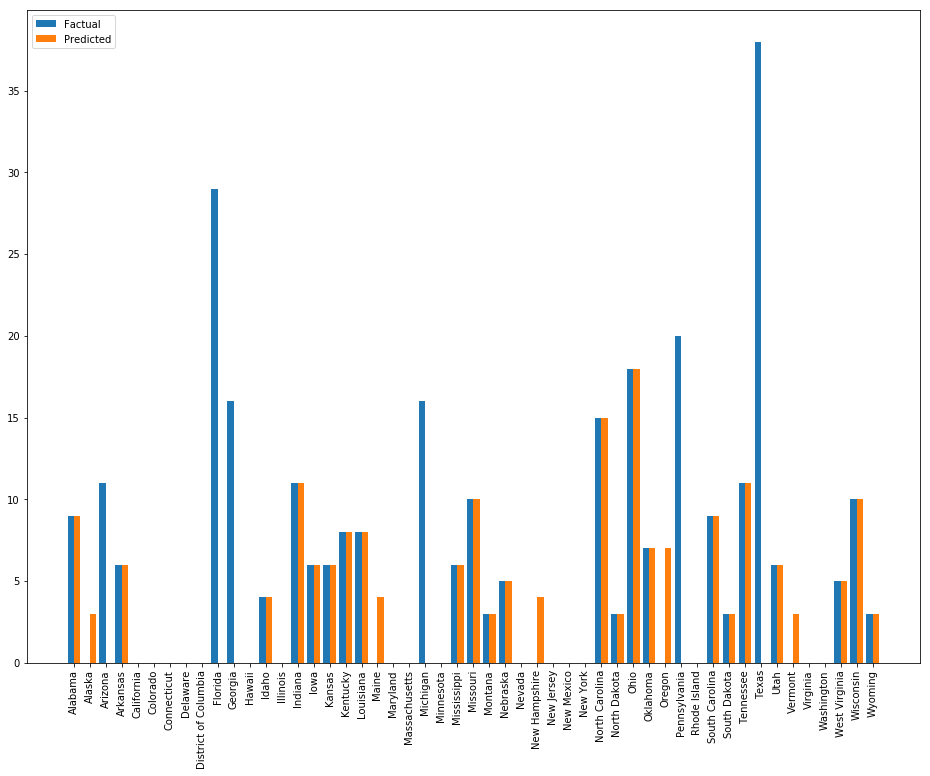

,State,EC_votes,votes16_trumpd,pred_rep_votes16,votes16_clintonh,pred_dem_votes16,rep_ec_votes,dem_ec_votes,pred_rep_ec_votes,pred_dem_ec_votes,accuracy
0,Alabama,9,1.306925e+06,1.235827e+06,7.180840e+05,8.299959e+05,9,0,9,0,1
1,Alaska,3,5.693971e+05,6.853069e+05,5.822321e+05,5.065063e+05,0,3,3,0,0
2,Arizona,11,1.021154e+06,5.915387e+05,9.362500e+05,1.670313e+06,11,0,0,11,0
3,Arkansas,6,6.566020e+05,7.688540e+05,3.717930e+05,2.557600e+05,6,0,6,0,1
4,California,55,3.916209e+06,1.740303e+06,7.362490e+06,1.124995e+07,0,55,0,55,1
5,Colorado,9,1.137455e+06,1.040795e+06,1.212209e+06,1.394508e+06,0,9,0,9,1
6,Connecticut,7,6.682660e+05,3.101258e+05,8.844320e+05,1.273479e+06,0,7,0,7,1
7,Delaware,3,1.851030e+05,1.677759e+05,2.355810e+05,2.401746e+05,0,3,0,3,1
8,District of Columbia,3,1.155300e+04,1.209825e+04,2.602230e+05,2.637108e+05,0,3,0,3,1
9,Florida,29,4.605515e+06,2.908113e+06,4.485745e+06,5.456781e+06,29,0,0,29,0


In [13]:

#Regression
from sklearn.linear_model import LogisticRegression as lr

my_regression = lr()
my_regression.fit(X, Y)
y_vote_share_prediction = my_regression.predict_proba(Xtest)


#Dataframe with Regression results.
 #Assumption: The total number of votes between Democratic and Republican party remains in the ranges seen in 2008 and 2012.Average of the total votes between Democratic and Republican party was used to derive the total votes per county from the predicted vote fraction
Z=final_df.loc[:,['State','County','total_avg_votes','votes16_trumpd','votes16_clintonh','frac_rep16']]
Z['frac_dem16']=1-Z['frac_rep16']
Z['rep_vote_share_pred'] = y_vote_share_prediction[:, 1]#Predicted Republican vote share
Z['dem_vote_share_pred'] = 1-Z['rep_vote_share_pred']#Predicted Democratic vote share
Z['pred_rep_votes16'] = Z['rep_vote_share_pred']*Z['total_avg_votes']#Predicted Republican votes
Z['pred_dem_votes16'] = (1-Z['rep_vote_share_pred'])*Z['total_avg_votes']#Predicted Democratic votes
Z['accuracy_real']=0 # added a column
Z['accuracy_pred']=0 # added a column
Z['accuracy_comb']=0 # added a column
Z.loc[Z['frac_rep16']>Z['frac_dem16'], 'accuracy_real']=1 # if the republican vote share is greater than democratic party,replace the 'accuracy_real' column values with 1.
Z.loc[Z['pred_rep_votes16']>Z['pred_dem_votes16'], 'accuracy_pred']=1 # if the predicted republican vote share is greater than predicted democratic party,replace the 'accuracy_real' column values with 1.
Z.loc[Z['accuracy_real']==Z['accuracy_pred'], 'accuracy_comb']=1 # if a correct prediction is made, replace the 'accuracy_comb' value with 1


bystate=Z.groupby(['State']).sum() # grouped by state and took a sum of all the votes by state
groupby_state=bystate.loc[:,['votes16_trumpd','pred_rep_votes16','votes16_clintonh','pred_dem_votes16']]
pred_df=pd.merge(ec_df,groupby_state,on='State')#merged the groupby state with EC votes dataframe
pred_df['rep_ec_votes']=0 # Republican party EC votes (Real)
pred_df['dem_ec_votes']=0 # Democratic party EC votes (Real)
pred_df['pred_rep_ec_votes']=0 # Republican party EC votes (Predicted)
pred_df['pred_dem_ec_votes']=0 # Democratic party EC votes (Predicted)

pred_df['accuracy']=0 # added a column


#For loops to transfer the electoral votes based on the winner (maximum votes) by state
for i in range(pred_df.shape[0]):
    if pred_df.loc[i,'votes16_trumpd'] > pred_df.loc[i,'votes16_clintonh']:
        pred_df.loc[i,'rep_ec_votes']=pred_df.loc[i,'rep_ec_votes']+pred_df.loc[i,'EC_votes']
    else:
        pred_df.loc[i,'dem_ec_votes']=pred_df.loc[i,'dem_ec_votes']+pred_df.loc[i,'EC_votes']
        
for i in range(pred_df.shape[0]):
    if pred_df.loc[i,'pred_rep_votes16'] > pred_df.loc[i,'pred_dem_votes16']:
        pred_df.loc[i,'pred_rep_ec_votes']=pred_df.loc[i,'pred_rep_ec_votes']+pred_df.loc[i,'EC_votes']
    else:
        pred_df.loc[i,'pred_dem_ec_votes']=pred_df.loc[i,'pred_dem_ec_votes']+pred_df.loc[i,'EC_votes']       
      

    
#Calculation pertaining to the accuracy of prediction
pred_df.loc[pred_df['rep_ec_votes']==pred_df['pred_rep_ec_votes'], 'accuracy']=1 # Counting the number of accurate predictions by state
    
print('Actual electoral votes of Republican party:',pred_df['rep_ec_votes'].sum())
print('Actual electoral votes of Democratic party:',pred_df['dem_ec_votes'].sum())
print('Predicted electoral votes of Republican party:',pred_df['pred_rep_ec_votes'].sum())
print('Predicted electoral votes of Democratic party:',pred_df['pred_dem_ec_votes'].sum())
print('Accuracy of the trained model:', my_regression.score(X, Y)*100,'%')
print('Accuracy of prediction by county:',(Z.loc[Z['accuracy_comb']==1,'accuracy_comb'].count())/Z.shape[0]*100,'%')
print('Accuracy of prediction by state:',(pred_df.loc[pred_df['accuracy']==1,'accuracy'].count())/pred_df.shape[0]*100,'%')

#plotting
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (16.0, 12.0)


y1 = pred_df['rep_ec_votes']
y2 = pred_df['pred_rep_ec_votes']
model=['Factual','Predicted']
x = pred_df['State']
xx=np.arange(len(x))

plt.bar(xx - 0.2, y1, 0.4)
plt.bar(xx + 0.2, y2, 0.4)
plt.xticks(xx,x,rotation=90)
plt.legend(model,loc=2)
plt.show()
pred_df

##### As an initial trial, all independent variables were used for logistic regression and an accuracy of 83% was achieved through the fit to the test data. But on using the model for prediction, model suggested that the Democrats won the election while Republicans won in actual election.

# Logistic Regression-Trial 2

Actual electoral votes of Republican party: 302
Actual electoral votes of Democratic party: 236
Predicted electoral votes of Republican party: 257
Predicted electoral votes of Democratic party: 281
Accuracy of the trained model: 82.77618592804839 %
Accuracy of prediction by county: 91.02196752626553 %
Accuracy of prediction by state: 76.47058823529412 %


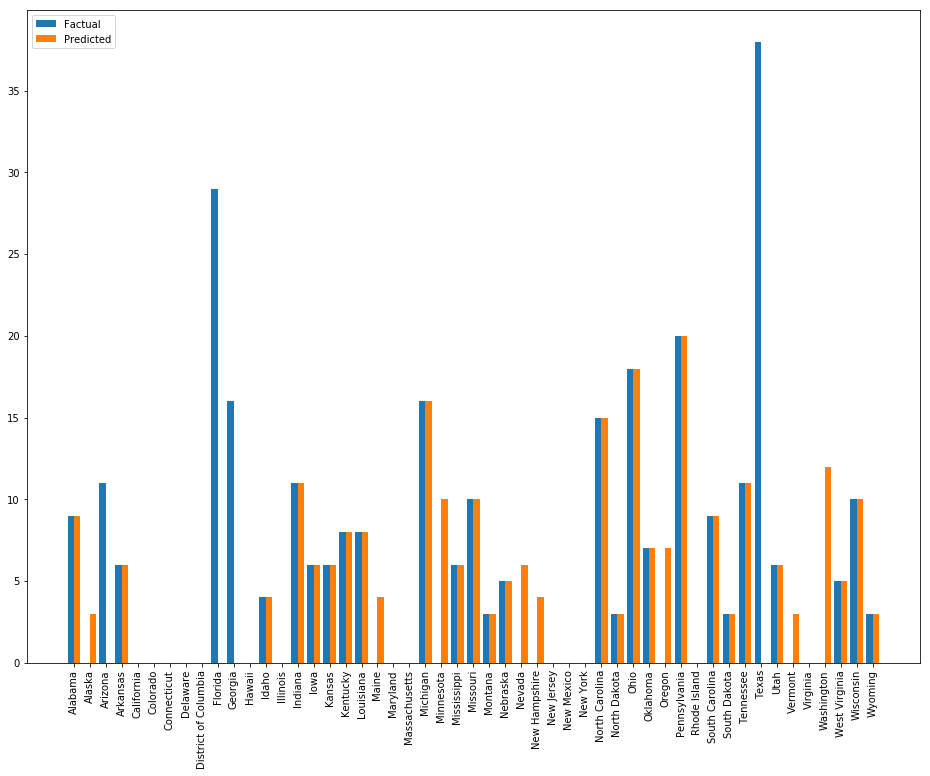

,State,EC_votes,votes16_trumpd,pred_rep_votes16,votes16_clintonh,pred_dem_votes16,rep_ec_votes,dem_ec_votes,pred_rep_ec_votes,pred_dem_ec_votes,accuracy
0,Alabama,9,1.306925e+06,1.167346e+06,7.180840e+05,8.984771e+05,9,0,9,0,1
1,Alaska,3,5.693971e+05,7.445066e+05,5.822321e+05,4.473066e+05,0,3,3,0,0
2,Arizona,11,1.021154e+06,1.054400e+06,9.362500e+05,1.207452e+06,11,0,0,11,0
3,Arkansas,6,6.566020e+05,6.823309e+05,3.717930e+05,3.422831e+05,6,0,6,0,1
4,California,55,3.916209e+06,3.524138e+06,7.362490e+06,9.466111e+06,0,55,0,55,1
5,Colorado,9,1.137455e+06,1.056340e+06,1.212209e+06,1.378963e+06,0,9,0,9,1
6,Connecticut,7,6.682660e+05,4.198623e+05,8.844320e+05,1.163742e+06,0,7,0,7,1
7,Delaware,3,1.851030e+05,1.577800e+05,2.355810e+05,2.501705e+05,0,3,0,3,1
8,District of Columbia,3,1.155300e+04,1.488005e+03,2.602230e+05,2.743210e+05,0,3,0,3,1
9,Florida,29,4.605515e+06,3.573245e+06,4.485745e+06,4.791649e+06,29,0,0,29,0


In [14]:
#Data Input
Y=combined['frac_rep']
X=combined.loc[:,["At Least Bachelors's Degree",'Graduate Degree','Construction.extraction.maintenance.and.repair.occupations',
'White','Black','Asian','Children.in.single.parent.households','Sexually.transmitted.infections','HIV.prevalence.rate',
'Unemployment']]

Xtest=final_df.loc[:,["At Least Bachelors's Degree",'Graduate Degree','Construction.extraction.maintenance.and.repair.occupations',
'White','Black','Asian','Children.in.single.parent.households','Sexually.transmitted.infections','HIV.prevalence.rate',
'Unemployment']]


#Regression
from sklearn.linear_model import LogisticRegression as lr

my_regression = lr()
my_regression.fit(X, Y)
y_vote_share_prediction = my_regression.predict_proba(Xtest)


#Dataframe with Regression results.
 #Assumption: The total number of votes between Democratic and Republican party remains in the ranges seen in 2008 and 2012.Average of the total votes between Democratic and Republican party was used to derive the total votes per county from the predicted vote fraction
Z=final_df.loc[:,['State','County','total_avg_votes','votes16_trumpd','votes16_clintonh','frac_rep16']]
Z['frac_dem16']=1-Z['frac_rep16']
Z['rep_vote_share_pred'] = y_vote_share_prediction[:, 1]#Predicted Republican vote share
Z['dem_vote_share_pred'] = 1-Z['rep_vote_share_pred']#Predicted Democratic vote share
Z['pred_rep_votes16'] = Z['rep_vote_share_pred']*Z['total_avg_votes']#Predicted Republican votes
Z['pred_dem_votes16'] = (1-Z['rep_vote_share_pred'])*Z['total_avg_votes']#Predicted Democratic votes
Z['accuracy_real']=0 # added a column
Z['accuracy_pred']=0 # added a column
Z['accuracy_comb']=0 # added a column
Z.loc[Z['frac_rep16']>Z['frac_dem16'], 'accuracy_real']=1 # if the republican vote share is greater than democratic party,replace the 'accuracy_real' column values with 1.
Z.loc[Z['pred_rep_votes16']>Z['pred_dem_votes16'], 'accuracy_pred']=1 # if the predicted republican vote share is greater than predicted democratic party,replace the 'accuracy_real' column values with 1.
Z.loc[Z['accuracy_real']==Z['accuracy_pred'], 'accuracy_comb']=1 # if a correct prediction is made, replace the 'accuracy_comb' value with 1


bystate=Z.groupby(['State']).sum() # grouped by state and took a sum of all the votes by state
groupby_state=bystate.loc[:,['votes16_trumpd','pred_rep_votes16','votes16_clintonh','pred_dem_votes16']]
pred_df=pd.merge(ec_df,groupby_state,on='State')#merged the groupby state with EC votes dataframe
pred_df['rep_ec_votes']=0 # Republican party EC votes (Real)
pred_df['dem_ec_votes']=0 # Democratic party EC votes (Real)
pred_df['pred_rep_ec_votes']=0 # Republican party EC votes (Predicted)
pred_df['pred_dem_ec_votes']=0 # Democratic party EC votes (Predicted)

pred_df['accuracy']=0 # added a column


#For loops to transfer the electoral votes based on the winner (maximum votes) by state
for i in range(pred_df.shape[0]):
    if pred_df.loc[i,'votes16_trumpd'] > pred_df.loc[i,'votes16_clintonh']:
        pred_df.loc[i,'rep_ec_votes']=pred_df.loc[i,'rep_ec_votes']+pred_df.loc[i,'EC_votes']
    else:
        pred_df.loc[i,'dem_ec_votes']=pred_df.loc[i,'dem_ec_votes']+pred_df.loc[i,'EC_votes']
        
for i in range(pred_df.shape[0]):
    if pred_df.loc[i,'pred_rep_votes16'] > pred_df.loc[i,'pred_dem_votes16']:
        pred_df.loc[i,'pred_rep_ec_votes']=pred_df.loc[i,'pred_rep_ec_votes']+pred_df.loc[i,'EC_votes']
    else:
        pred_df.loc[i,'pred_dem_ec_votes']=pred_df.loc[i,'pred_dem_ec_votes']+pred_df.loc[i,'EC_votes']       
      

    
#Calculation pertaining to the accuracy of prediction
pred_df.loc[pred_df['rep_ec_votes']==pred_df['pred_rep_ec_votes'], 'accuracy']=1 # Counting the number of accurate predictions by state
    
print('Actual electoral votes of Republican party:',pred_df['rep_ec_votes'].sum())
print('Actual electoral votes of Democratic party:',pred_df['dem_ec_votes'].sum())
print('Predicted electoral votes of Republican party:',pred_df['pred_rep_ec_votes'].sum())
print('Predicted electoral votes of Democratic party:',pred_df['pred_dem_ec_votes'].sum())
print('Accuracy of the trained model:', my_regression.score(X, Y)*100,'%')
print('Accuracy of prediction by county:',(Z.loc[Z['accuracy_comb']==1,'accuracy_comb'].count())/Z.shape[0]*100,'%')
print('Accuracy of prediction by state:',(pred_df.loc[pred_df['accuracy']==1,'accuracy'].count())/pred_df.shape[0]*100,'%')

#plotting
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (16.0, 12.0)


y1 = pred_df['rep_ec_votes']
y2 = pred_df['pred_rep_ec_votes']
model=['Factual','Predicted']
x = pred_df['State']
xx=np.arange(len(x))

plt.bar(xx - 0.2, y1, 0.4)
plt.bar(xx + 0.2, y2, 0.4)
plt.xticks(xx,x,rotation=90)
plt.legend(model,loc=2)
plt.show()
pred_df



##### As a second trial, all independent variables with correlation coefficients greater than |0.3| was used as the test data. The accuracy of the model did not reflect any significant change suggesting that the additional variables in the first trial were not significant. Although, the prediction improved, the model still suggests that the Democrats are the winner. 

# Logistic Regression-Trial 3

Actual electoral votes of Republican party: 302
Actual electoral votes of Democratic party: 236
Predicted electoral votes of Republican party: 208
Predicted electoral votes of Democratic party: 330
Accuracy of the trained model: 82.52148997134671 %
Accuracy of prediction by county: 91.49952244508118 %
Accuracy of prediction by state: 76.47058823529412 %


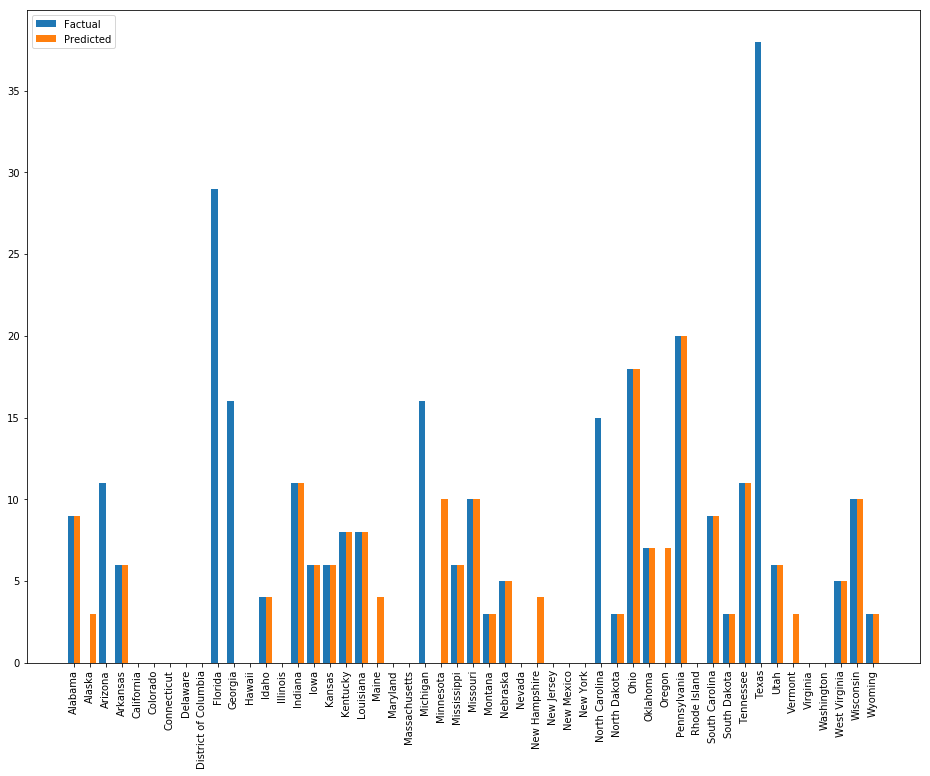

,State,EC_votes,votes16_trumpd,pred_rep_votes16,votes16_clintonh,pred_dem_votes16,rep_ec_votes,dem_ec_votes,pred_rep_ec_votes,pred_dem_ec_votes,accuracy
0,Alabama,9,1.306925e+06,1.161575e+06,7.180840e+05,9.042481e+05,9,0,9,0,1
1,Alaska,3,5.693971e+05,7.392089e+05,5.822321e+05,4.526044e+05,0,3,3,0,0
2,Arizona,11,1.021154e+06,5.534869e+05,9.362500e+05,1.708365e+06,11,0,0,11,0
3,Arkansas,6,6.566020e+05,6.915227e+05,3.717930e+05,3.330913e+05,6,0,6,0,1
4,California,55,3.916209e+06,1.755622e+06,7.362490e+06,1.123463e+07,0,55,0,55,1
5,Colorado,9,1.137455e+06,1.005637e+06,1.212209e+06,1.429666e+06,0,9,0,9,1
6,Connecticut,7,6.682660e+05,4.257976e+05,8.844320e+05,1.157807e+06,0,7,0,7,1
7,Delaware,3,1.851030e+05,1.629919e+05,2.355810e+05,2.449586e+05,0,3,0,3,1
8,District of Columbia,3,1.155300e+04,1.025626e+04,2.602230e+05,2.655527e+05,0,3,0,3,1
9,Florida,29,4.605515e+06,3.349355e+06,4.485745e+06,5.015539e+06,29,0,0,29,0


In [15]:
Y=combined['frac_rep']
X=combined.loc[:,["At Least Bachelors's Degree",'Graduate Degree','Total Population','Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
'Gini.Coefficient','Service.occupations','Farming.fishing.and.forestry.occupations','Construction.extraction.maintenance.and.repair.occupations',
'White','Black','Asian','SIRE_homogeneity','median_age','Children.in.single.parent.households','Sexually.transmitted.infections','HIV.prevalence.rate',
'Uninsured','Unemployment','Violent.crime','Injury.deaths']]

Xtest=final_df.loc[:,["At Least Bachelors's Degree",'Graduate Degree','Total Population','Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
'Gini.Coefficient','Service.occupations','Farming.fishing.and.forestry.occupations','Construction.extraction.maintenance.and.repair.occupations',
'White','Black','Asian','SIRE_homogeneity','median_age','Children.in.single.parent.households','Sexually.transmitted.infections','HIV.prevalence.rate',
'Uninsured','Unemployment','Violent.crime','Injury.deaths']]


#Regression
from sklearn.linear_model import LogisticRegression as lr

my_regression = lr()
my_regression.fit(X, Y)
y_vote_share_prediction = my_regression.predict_proba(Xtest)


#Dataframe with Regression results.
 #Assumption: The total number of votes between Democratic and Republican party remains in the ranges seen in 2008 and 2012.Average of the total votes between Democratic and Republican party was used to derive the total votes per county from the predicted vote fraction
Z=final_df.loc[:,['State','County','total_avg_votes','votes16_trumpd','votes16_clintonh','frac_rep16']]
Z['frac_dem16']=1-Z['frac_rep16']
Z['rep_vote_share_pred'] = y_vote_share_prediction[:, 1]#Predicted Republican vote share
Z['dem_vote_share_pred'] = 1-Z['rep_vote_share_pred']#Predicted Democratic vote share
Z['pred_rep_votes16'] = Z['rep_vote_share_pred']*Z['total_avg_votes']#Predicted Republican votes
Z['pred_dem_votes16'] = (1-Z['rep_vote_share_pred'])*Z['total_avg_votes']#Predicted Democratic votes
Z['accuracy_real']=0 # added a column
Z['accuracy_pred']=0 # added a column
Z['accuracy_comb']=0 # added a column
Z.loc[Z['frac_rep16']>Z['frac_dem16'], 'accuracy_real']=1 # if the republican vote share is greater than democratic party,replace the 'accuracy_real' column values with 1.
Z.loc[Z['pred_rep_votes16']>Z['pred_dem_votes16'], 'accuracy_pred']=1 # if the predicted republican vote share is greater than predicted democratic party,replace the 'accuracy_real' column values with 1.
Z.loc[Z['accuracy_real']==Z['accuracy_pred'], 'accuracy_comb']=1 # if a correct prediction is made, replace the 'accuracy_comb' value with 1


bystate=Z.groupby(['State']).sum() # grouped by state and took a sum of all the votes by state
groupby_state=bystate.loc[:,['votes16_trumpd','pred_rep_votes16','votes16_clintonh','pred_dem_votes16']]
pred_df=pd.merge(ec_df,groupby_state,on='State')#merged the groupby state with EC votes dataframe
pred_df['rep_ec_votes']=0 # Republican party EC votes (Real)
pred_df['dem_ec_votes']=0 # Democratic party EC votes (Real)
pred_df['pred_rep_ec_votes']=0 # Republican party EC votes (Predicted)
pred_df['pred_dem_ec_votes']=0 # Democratic party EC votes (Predicted)

pred_df['accuracy']=0 # added a column


#For loops to transfer the electoral votes based on the winner (maximum votes) by state
for i in range(pred_df.shape[0]):
    if pred_df.loc[i,'votes16_trumpd'] > pred_df.loc[i,'votes16_clintonh']:
        pred_df.loc[i,'rep_ec_votes']=pred_df.loc[i,'rep_ec_votes']+pred_df.loc[i,'EC_votes']
    else:
        pred_df.loc[i,'dem_ec_votes']=pred_df.loc[i,'dem_ec_votes']+pred_df.loc[i,'EC_votes']
        
for i in range(pred_df.shape[0]):
    if pred_df.loc[i,'pred_rep_votes16'] > pred_df.loc[i,'pred_dem_votes16']:
        pred_df.loc[i,'pred_rep_ec_votes']=pred_df.loc[i,'pred_rep_ec_votes']+pred_df.loc[i,'EC_votes']
    else:
        pred_df.loc[i,'pred_dem_ec_votes']=pred_df.loc[i,'pred_dem_ec_votes']+pred_df.loc[i,'EC_votes']       
      

    
#Calculation pertaining to the accuracy of prediction
pred_df.loc[pred_df['rep_ec_votes']==pred_df['pred_rep_ec_votes'], 'accuracy']=1 # Counting the number of accurate predictions by state
    
print('Actual electoral votes of Republican party:',pred_df['rep_ec_votes'].sum())
print('Actual electoral votes of Democratic party:',pred_df['dem_ec_votes'].sum())
print('Predicted electoral votes of Republican party:',pred_df['pred_rep_ec_votes'].sum())
print('Predicted electoral votes of Democratic party:',pred_df['pred_dem_ec_votes'].sum())
print('Accuracy of the trained model:', my_regression.score(X, Y)*100,'%')
print('Accuracy of prediction by county:',(Z.loc[Z['accuracy_comb']==1,'accuracy_comb'].count())/Z.shape[0]*100,'%')
print('Accuracy of prediction by state:',(pred_df.loc[pred_df['accuracy']==1,'accuracy'].count())/pred_df.shape[0]*100,'%')

#plotting
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (16.0, 12.0)


y1 = pred_df['rep_ec_votes']
y2 = pred_df['pred_rep_ec_votes']
model=['Factual','Predicted']
x = pred_df['State']
xx=np.arange(len(x))

plt.bar(xx - 0.2, y1, 0.4)
plt.bar(xx + 0.2, y2, 0.4)
plt.xticks(xx,x,rotation=90)
plt.legend(model,loc=2)
plt.show()
pred_df



##### As a third trial, all independent variables with correlation coefficients greater than |0.2| were used as the test data. The accuracy of the model did not reflect any significant change suggesting that the additional variables in the first trial were not significant. The prediction accuracy dropped from previous trial, restricting the input of independent variables in the test data to the variables with correlation coefficients above |0.35|.

# Logistic Regression-Trial 4 (Final Model)

Actual electoral votes of Republican party: 302
Actual electoral votes of Democratic party: 236
Predicted electoral votes of Republican party: 301
Predicted electoral votes of Democratic party: 237
Accuracy of the trained model: 82.29863100923272 %
Accuracy of prediction by county: 91.40401146131805 %
Accuracy of prediction by state: 78.43137254901961 %


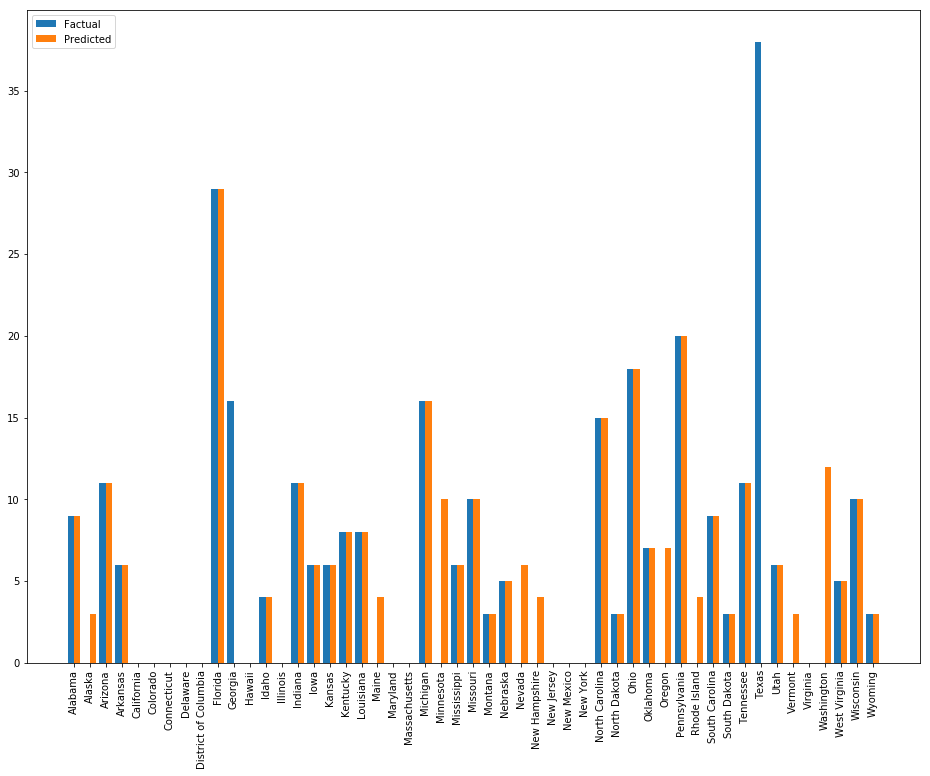

,State,EC_votes,votes16_trumpd,pred_rep_votes16,votes16_clintonh,pred_dem_votes16,rep_ec_votes,dem_ec_votes,pred_rep_ec_votes,pred_dem_ec_votes,accuracy
0,Alabama,9,1.306925e+06,1.107069e+06,7.180840e+05,9.587542e+05,9,0,9,0,1
1,Alaska,3,5.693971e+05,6.811787e+05,5.822321e+05,5.106345e+05,0,3,3,0,0
2,Arizona,11,1.021154e+06,1.136539e+06,9.362500e+05,1.125313e+06,11,0,11,0,1
3,Arkansas,6,6.566020e+05,7.028294e+05,3.717930e+05,3.217846e+05,6,0,6,0,1
4,California,55,3.916209e+06,4.400294e+06,7.362490e+06,8.589955e+06,0,55,0,55,1
5,Colorado,9,1.137455e+06,1.043213e+06,1.212209e+06,1.392090e+06,0,9,0,9,1
6,Connecticut,7,6.682660e+05,4.872147e+05,8.844320e+05,1.096390e+06,0,7,0,7,1
7,Delaware,3,1.851030e+05,1.701533e+05,2.355810e+05,2.377972e+05,0,3,0,3,1
8,District of Columbia,3,1.155300e+04,1.653891e+04,2.602230e+05,2.592701e+05,0,3,0,3,1
9,Florida,29,4.605515e+06,4.288249e+06,4.485745e+06,4.076645e+06,29,0,29,0,1


In [38]:
Y=combined['frac_rep']
X=combined.loc[:,['White','Graduate Degree','Black','Sexually.transmitted.infections']]

Xtest=final_df.loc[:,['White','Graduate Degree','Black','Sexually.transmitted.infections']]

#Regression
from sklearn.linear_model import LogisticRegression as lr

my_regression = lr()
my_regression.fit(X, Y)
y_vote_share_prediction = my_regression.predict_proba(Xtest)


#Dataframe with Regression results.
 #Assumption: The total number of votes between Democratic and Republican party remains in the ranges seen in 2008 and 2012.Average of the total votes between Democratic and Republican party was used to derive the total votes per county from the predicted vote fraction
Z=final_df.loc[:,['State','County','total_avg_votes','votes16_trumpd','votes16_clintonh','frac_rep16']]
Z['frac_dem16']=1-Z['frac_rep16']
Z['rep_vote_share_pred'] = y_vote_share_prediction[:, 1]#Predicted Republican vote share
Z['dem_vote_share_pred'] = 1-Z['rep_vote_share_pred']#Predicted Democratic vote share
Z['pred_rep_votes16'] = Z['rep_vote_share_pred']*Z['total_avg_votes']#Predicted Republican votes
Z['pred_dem_votes16'] = (1-Z['rep_vote_share_pred'])*Z['total_avg_votes']#Predicted Democratic votes
Z['accuracy_real']=0 # added a column
Z['accuracy_pred']=0 # added a column
Z['accuracy_comb']=0 # added a column
Z.loc[Z['frac_rep16']>Z['frac_dem16'], 'accuracy_real']=1 # if the republican vote share is greater than democratic party,replace the 'accuracy_real' column values with 1.
Z.loc[Z['pred_rep_votes16']>Z['pred_dem_votes16'], 'accuracy_pred']=1 # if the predicted republican vote share is greater than predicted democratic party,replace the 'accuracy_real' column values with 1.
Z.loc[Z['accuracy_real']==Z['accuracy_pred'], 'accuracy_comb']=1 # if a correct prediction is made, replace the 'accuracy_comb' value with 1


bystate=Z.groupby(['State']).sum() # grouped by state and took a sum of all the votes by state
groupby_state=bystate.loc[:,['votes16_trumpd','pred_rep_votes16','votes16_clintonh','pred_dem_votes16']]
pred_df=pd.merge(ec_df,groupby_state,on='State')#merged the groupby state with EC votes dataframe
pred_df['rep_ec_votes']=0 # Republican party EC votes (Real)
pred_df['dem_ec_votes']=0 # Democratic party EC votes (Real)
pred_df['pred_rep_ec_votes']=0 # Republican party EC votes (Predicted)
pred_df['pred_dem_ec_votes']=0 # Democratic party EC votes (Predicted)

pred_df['accuracy']=0 # added a column


#For loops to transfer the electoral votes based on the winner (maximum votes) by state
for i in range(pred_df.shape[0]):
    if pred_df.loc[i,'votes16_trumpd'] > pred_df.loc[i,'votes16_clintonh']:
        pred_df.loc[i,'rep_ec_votes']=pred_df.loc[i,'rep_ec_votes']+pred_df.loc[i,'EC_votes']
    else:
        pred_df.loc[i,'dem_ec_votes']=pred_df.loc[i,'dem_ec_votes']+pred_df.loc[i,'EC_votes']
        
for i in range(pred_df.shape[0]):
    if pred_df.loc[i,'pred_rep_votes16'] > pred_df.loc[i,'pred_dem_votes16']:
        pred_df.loc[i,'pred_rep_ec_votes']=pred_df.loc[i,'pred_rep_ec_votes']+pred_df.loc[i,'EC_votes']
    else:
        pred_df.loc[i,'pred_dem_ec_votes']=pred_df.loc[i,'pred_dem_ec_votes']+pred_df.loc[i,'EC_votes']       
      

    
#Calculation pertaining to the accuracy of prediction
pred_df.loc[pred_df['rep_ec_votes']==pred_df['pred_rep_ec_votes'], 'accuracy']=1 # Counting the number of accurate predictions by state
    
print('Actual electoral votes of Republican party:',pred_df['rep_ec_votes'].sum())
print('Actual electoral votes of Democratic party:',pred_df['dem_ec_votes'].sum())
print('Predicted electoral votes of Republican party:',pred_df['pred_rep_ec_votes'].sum())
print('Predicted electoral votes of Democratic party:',pred_df['pred_dem_ec_votes'].sum())
print('Accuracy of the trained model:', my_regression.score(X, Y)*100,'%')
print('Accuracy of prediction by county:',(Z.loc[Z['accuracy_comb']==1,'accuracy_comb'].count())/Z.shape[0]*100,'%')
print('Accuracy of prediction by state:',(pred_df.loc[pred_df['accuracy']==1,'accuracy'].count())/pred_df.shape[0]*100,'%')

#plotting
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (16.0, 12.0)


y1 = pred_df['rep_ec_votes']
y2 = pred_df['pred_rep_ec_votes']
model=['Factual','Predicted']
x = pred_df['State']
xx=np.arange(len(x))

plt.bar(xx - 0.2, y1, 0.4)
plt.bar(xx + 0.2, y2, 0.4)
plt.xticks(xx,x,rotation=90)
plt.legend(model,loc=2)
plt.show()
pred_df



##### The final model has independent variables with correlation coefficients greater than |0.35|. The model has an accuracy of 82% with the training data. The vote split among the different parties has been accurate although the distribution of votes across States are slightly different.Winners of the 40 states were accurately predicted out of the 51 states. 90% of the winners in counties were successfully predicted using the model.

## Analysis on Mispredicted States

In [66]:
texas=Z.loc[Z['State']=='Texas']
print(texas['votes16_trumpd'].sum())
print(texas['votes16_clintonh'].sum())
print(texas['pred_rep_votes16'].sum())
print(texas['pred_dem_votes16'].sum())
t=final_df.loc[final_df['State']=='Texas']
print(t["Republicans 08 (Votes)"].sum())
print(t["Democrats 08 (Votes)"].sum())
print(t["Republicans 12 (Votes)"].sum())
print(t["Democrats 12 (Votes)"].sum())
print('Accuracy of prediction by counties in Texas:',(texas.loc[texas['accuracy_comb']==1,'accuracy_comb'].count())/texas.shape[0]*100,'%')

4681590.0
3867816.0
3623099.3443785496
4319864.65562145
4479328.0
3528633.0
4569843.0
3308124.0
Accuracy of prediction by counties in Texas: 90.5511811023622 %


In [65]:
Nevada=Z.loc[Z['State']=='Nevada']
print(Nevada['votes16_trumpd'].sum())
print(Nevada['votes16_clintonh'].sum())
print(Nevada['pred_rep_votes16'].sum())
print(Nevada['pred_dem_votes16'].sum())
N=final_df.loc[final_df['State']=='Nevada']
print(N["Republicans 08 (Votes)"].sum())
print(N["Democrats 08 (Votes)"].sum())
print(N["Republicans 12 (Votes)"].sum())
print(N["Democrats 12 (Votes)"].sum())
print('Accuracy of prediction by counties in Nevada:',(Nevada.loc[Nevada['accuracy_comb']==1,'accuracy_comb'].count())/Nevada.shape[0]*100,'%')

511319.0
537753.0
581244.5408330653
389506.9591669348
412827.0
533736.0
463567.0
531373.0
Accuracy of prediction by counties in Nevada: 88.23529411764706 %


##### On further analysis on states whose winners were not correctly predicted, it was understood that modelling a state where the parties fought closely was difficult. Similarly, states were there are no consistent winners are difficut to model. These states are called 'swinging states' and includes the states  Colorado, Florida, Iowa, Michigan, Minnesota, Ohio, Nevada, New Hampshire, North Carolina, Pennsylvania, Virginia, and Wisconsin. This explains the inability of the model in predicting the winners in Minnesota, Nevada and New Hampshire.